# Pymaceuticals Inc

![Laboratory](../Images/Laboratory.jpg)

While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've since joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego, CA. Pymaceuticals specializes in drug-based, anti-cancer pharmaceuticals. In their most recent efforts, they've since begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As their Chief Data Analyst, you've been given access to the complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import sem

In [2]:
#import mouse trial data
clinical_df = pd.read_csv('raw_data/clinicaltrial_data.csv')
clinical_df.head()
#plt.style.use('seaborn-colorblind')

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
#import files on which mouse recieved which drug
drug_df = pd.read_csv('raw_data/mouse_drug_data.csv')
#one mouse received 2 drugs, dropped both
drug_df.drop_duplicates(inplace=True,subset =['Mouse ID'], keep = False)
drug_df.head()


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
merged_df = drug_df.merge(clinical_df, on = 'Mouse ID')
print(merged_df.columns)
merged_df.dropna()
maxtime = merged_df['Timepoint'].max()
mintime = merged_df['Timepoint'].min()
merged_df.head()

Index(['Mouse ID', 'Drug', 'Timepoint', 'Tumor Volume (mm3)',
       'Metastatic Sites'],
      dtype='object')


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


/Users/nicksteinhauser/anaconda/envs/pydata/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


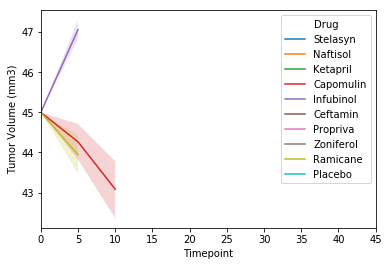

In [5]:
#tried using this seaborn function, I think its failing when a subject in a dataline dies
#any insight would be appreciated
sns.tsplot(data = merged_df, time='Timepoint', value = 'Tumor Volume (mm3)', unit = 'Mouse ID', condition= 'Drug')
plt.show()

In [6]:
group = merged_df.groupby(['Drug','Timepoint'])

size_group = group.agg({'Tumor Volume (mm3)': ['mean', sem]}).unstack(0)
#ordering group by contents of 45th timepoint so that legend will be ranked in order of tumor volume 
#and correspond to the intersection with the graph border done later for each plot
ordered_size_group = size_group['Tumor Volume (mm3)']['mean'].T.sort_values(by=45, ascending = False).T
ordered_size_group.head()

Drug,Ketapril,Naftisol,Stelasyn,Placebo,Propriva,Zoniferol,Infubinol,Ceftamin,Capomulin,Ramicane
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,47.389175,46.796098,47.470830,47.125589,47.168130,46.851818,47.062001,46.503051,44.266086,43.944859
10,49.582269,48.694210,49.335368,49.423329,48.938560,48.689881,49.403909,48.285125,43.084291,42.531957
15,52.399974,50.933018,51.448025,51.359742,50.891769,50.779059,51.296397,50.094055,42.064317,41.495061
20,54.920935,53.644087,53.970080,54.364417,53.127384,53.170334,53.197691,52.157049,40.716325,40.238325


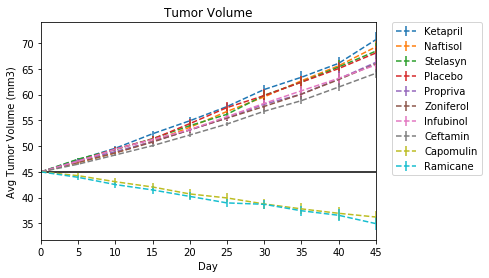

In [7]:
ordered_size_group .plot( 
    yerr = size_group['Tumor Volume (mm3)']['sem'],
    linestyle = 'dashed', linewidth = 1.5
)

plt.title('Tumor Volume') #vs Time
plt.ylabel('Avg Tumor Volume (mm3)') #among all test subjects per drug
plt.xlabel('Day') #presumed 

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #note: legend is in graph endpoint order
plt.hlines(xmin = mintime,xmax = maxtime, y = 45, colors='black', linewidth = 1.5) #x axis

plt.show()

* Create a scatter plot that shows how the tumor volume changes over time for each treatment.

In [8]:
metastasis_group = group.agg({'Metastatic Sites': ['mean', sem]}).unstack(0)
ordered_metastasis_group = metastasis_group['Metastatic Sites']['mean'].T.sort_values(by=maxtime, ascending = False).T
ordered_metastasis_group.head()

Drug,Ketapril,Placebo,Zoniferol,Ceftamin,Propriva,Naftisol,Infubinol,Stelasyn,Capomulin,Ramicane
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.304348,0.375000,0.166667,0.380952,0.347826,0.260870,0.280000,0.260870,0.160000,0.120000
10,0.590909,0.833333,0.500000,0.600000,0.619048,0.523810,0.666667,0.523810,0.320000,0.250000
15,0.842105,1.250000,0.809524,0.789474,0.800000,0.857143,0.904762,0.809524,0.375000,0.333333
20,1.210526,1.526316,1.294118,1.111111,1.000000,1.150000,1.050000,0.947368,0.652174,0.347826


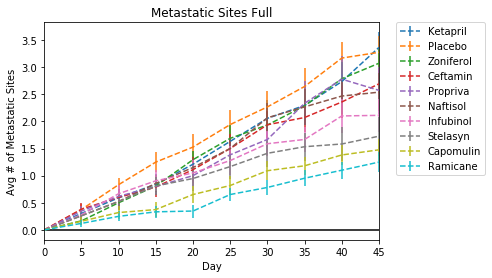

In [9]:
ordered_metastasis_group.plot(yerr = metastasis_group['Metastatic Sites']['sem'], linewidth = 1.5, linestyle = 'dashed')

plt.title('Metastatic Sites Full') #vs Time
plt.ylabel('Avg # of Metastatic Sites') #among all test subjects per drug
plt.xlabel('Day') #presumed 

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #note: legend is in graph endpoint order
plt.hlines(xmin = mintime,xmax = maxtime, y = 0, colors='black', linewidth = 1.5) #x axis

plt.show()

* Create a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.

In [10]:
group = merged_df.groupby(['Drug','Timepoint'])

survival_group = group.agg({'Tumor Volume (mm3)': ['count']}).unstack(0)
survival_group.head()
ordered_survival_group = survival_group['Tumor Volume (mm3)']['count'].T.sort_values(by=maxtime, ascending = False).T
ordered_survival_group.head()

Drug,Capomulin,Ramicane,Zoniferol,Ceftamin,Naftisol,Ketapril,Placebo,Stelasyn,Infubinol,Propriva
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,24,25,24
5,25,25,24,21,23,23,24,23,25,23
10,25,24,22,20,21,22,24,21,21,21
15,24,24,21,19,21,19,20,21,21,15
20,23,23,17,18,20,19,19,19,20,15


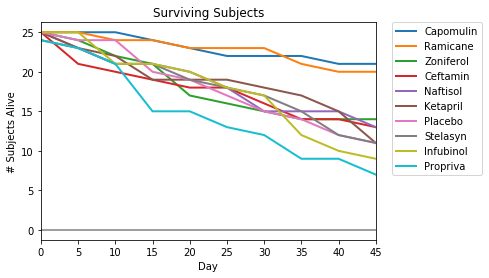

In [11]:
ordered_survival_group.plot(linewidth = 2)

plt.title('Surviving Subjects') #vs Time
plt.xlabel('Day') #presumably
plt.ylabel('# Subjects Alive') #number of subjects treated with a drug that are still alive at a timepoint

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #note: legend is in graph endpoint order
plt.hlines(xmin = mintime,xmax = maxtime, y = 0, colors='black', linewidth = 1.5, alpha = .5) #axis
plt.show()
#NOTE: Propriva begins with 24 subjects not 25

* Create a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)

In [12]:
#size_group.head()
group = merged_df.groupby(['Drug','Timepoint'])

percent_group = group.agg({'Tumor Volume (mm3)': 'mean'}).unstack(1)
percent_group.head()


Tumor Volume (mm3)                                              \
Timepoint                 0          5          10         15         20   
Drug                                                                       
Capomulin               45.0  44.266086  43.084291  42.064317  40.716325   
Ceftamin                45.0  46.503051  48.285125  50.094055  52.157049   
Infubinol               45.0  47.062001  49.403909  51.296397  53.197691   
Ketapril                45.0  47.389175  49.582269  52.399974  54.920935   
Naftisol                45.0  46.796098  48.694210  50.933018  53.644087   

                                                                  
Timepoint         25         30         35         40         45  
Drug                                                              
Capomulin  39.939528  38.769339  37.816839  36.958001  36.236114  
Ceftamin   54.287674  56.769517  58.827548  61.467895  64.132421  
Infubinol  55.715252  58.299397  60.742461  63.162824  65.755562  
Ketapril   57.678982  60.994507  63.371686  66.068580  70.662958  
Naftisol   56.731968  59.559509  62.685087  65.600754  69.265506

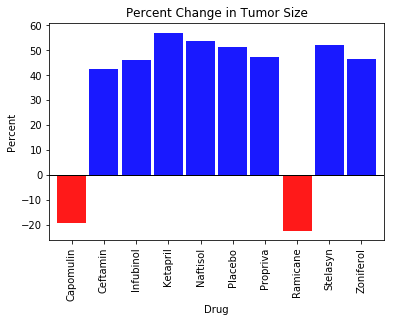

In [13]:
#percent_group = size_group['Tumor Volume (mm3)']['mean']
percents = ((percent_group['Tumor Volume (mm3)'][maxtime]-percent_group['Tumor Volume (mm3)'][mintime]) / percent_group['Tumor Volume (mm3)'][mintime]) *100

color = []
for value in percents:
    if value >= 0:
        color.append('Blue')
    else:
        color.append('Red')

percents.plot(kind = 'bar', color= [color], alpha =.9, width = .9)
plt.title('Percent Change in Tumor Size')
plt.xlabel('Drug')
plt.ylabel('Percent')
plt.hlines(xmin = mintime - 4,xmax = maxtime, y = 0, colors='black', linewidth = 1)
plt.show()

* Create a bar graph that compares the total % tumor volume change for each drug across the full 45 days.